Introduction

For this project we use DBSCAN for clustering. The data set money.csv contains the measurements of 200, of the 1000 Swiss Franc banknotes. For each banknote the following six measurements were recorded: the length of the note (x1), the left width of the note (x2), the right width of the note (x3), the width of the margin at the bottom of the note (x4), the width of the margin at the top of the note (x5) and the diagonal length of the inner frame of the note (x6).

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Read money csv
df = pd.read_csv("money.csv")

In [3]:
df.head()

,Length,Left,Right,Bottom,Top,Diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8


In [4]:
money = df

<AxesSubplot:>

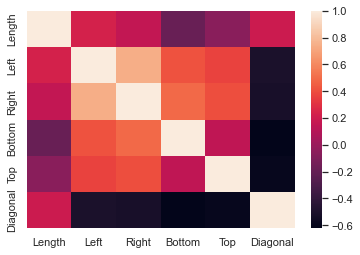

In [5]:
sns.heatmap(df.corr())

***Cluster Tendency***

*Create a scatter plot matrix of the data set; the features used for each individual scatter plot should be indicated on the scatter plot.*

In [1]:
#Scatter plot matrix of the data set

Below is a scatter plot matrix to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables(e.g Diagonal vs Right), allowing many relationships to be explored in one chart.

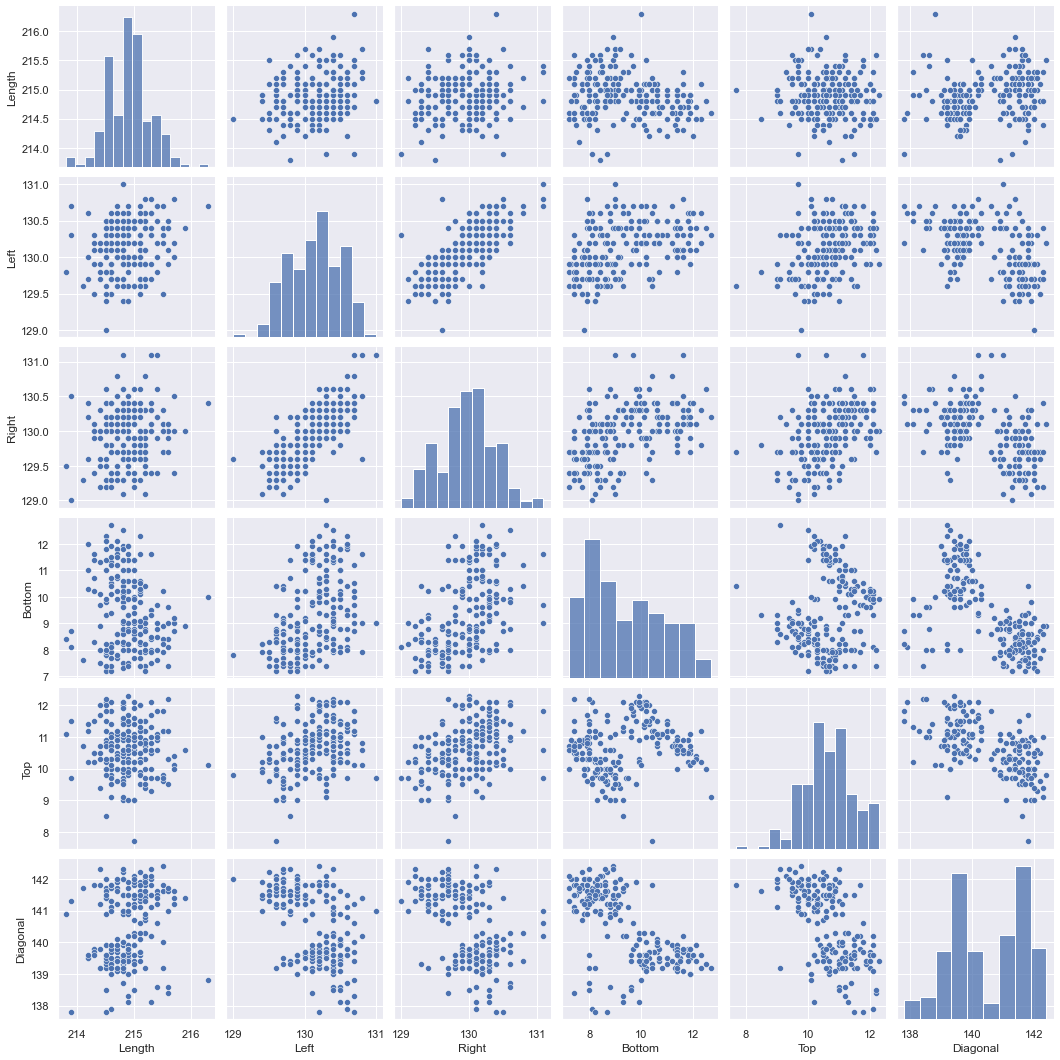

In [7]:
sns.pairplot(money)

The diagonal feature has the lowest correlation to other features and with this we can conclude that it gives the best separate clear clusters.The clusters are separated because they are not highly correlated to each other.

In [8]:
# For the warning:*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping 
#will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 
#2D array with a single row if you intend to specify the same RGB or RGBA value for all points.

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

Looking at the money data set, there are clear visible clusters. Looking at the matrix the feature Diagonal vs any other features(Length,Left,Right,Bottom and Top) produces a clear visible seperate clusters. It seems without the feature Diagonal we can hardly get clear clusters, most of the features do not produce clear and visible clusters, with that being said Top vs Bottom does show 2 clusters even though they are not clear. Seeing this we can conclude that the feature Diagonal is the most important feature in forming separate clusters.

The diagonal feature has the lowest correlation to other features and with this we can conclude that it gives the best separate clear clusters.The clusters are separated because they are not highly correlated to each other.

*Next we determine whether clustering could potentially produce meaningful clusters by performing a Visual Assessment of Cluster Tendency. Provide the ordered dissimilarity image along with an interpretation of the image.*

***Normalisation***

The data is not normalised. Looking at the scatter plot matrix above there not all of the data is normally distributed. As much as it is not normal distributed, all the features are of the same scale so no normalization or standardisation is required. Normalisation is required when features are of different scales. Standardisation is useful when the feature distribution is Normal or Gaussian.

In [11]:
# extracting the above mentioned columns
x = df.loc[:, ['Length',
                 'Diagonal']].values

In [12]:
#pip install pyclustertend

In [13]:
from pyclustertend import vat

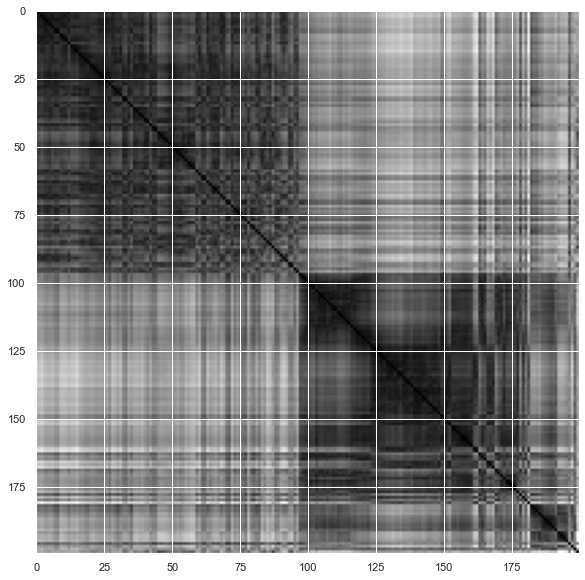

In [14]:
vat(money)

Visual Assessment of Tendency (VAT) algorithm is tool for assessing cluster tendency. Visual Assessment of Tendency outputs a matrix that can be used for veiwing/studying cluster tendency in explored data. However, VAT becomes hard to control for large data sets. Luckily the money data set is not large.

The rule of thumb to calculate the number of clusters for a given VAT algorithm is to calculate the number of densely black squares within the printed map.

From the above we can see 2 big densely black sqaures within the map. So we can confidently say there are at least 2 clusters. 


It is worth mentioning that there is a possibility of clusteres within clusters. The densley black square at the bottom right corner has another small densely black sqaure inside it. With this there is a possibility of more clusters, maybe 3 clusters but what we know for certain is that there are at least 2 clusters.

***DBSCAN (Density-based spatial clustering of applications with noise)***




*Given that Mpts = 5, create an ordered k-distance graph to aid in identifying appropriate values for Eps.*

***Answer***

DBSCAN has some requirements for the model to run, to define ‘density’: there is a minimum number of points required to form a dense region, min samples and Eps needed to be clearly stated. Higher min samples or lower eps demands greater density to form a cluster.

The K-distance graph is a technique to determine Eps. This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You will find the optimal value for Eps at the point of where the curve(elbow is at its maximum. To put it simple, it is where the graph has the greatest slope.

In [15]:
#implementing DBSCAN
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [16]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

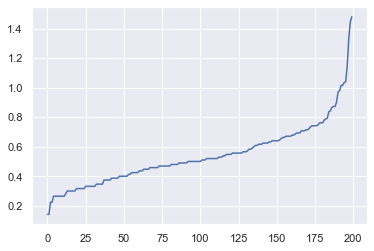

In [17]:
#ordered k-distance graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)



*From the k-distance graph it is not always clear which specific Eps value to select. Instead, the graph can be used to select a suitable search range of Eps values. Using the graph provided in Question 4, identify a suitable upper (Eps_max) and lower (Eps_min) search limit for Eps. Motivate your selection of Eps_max and Eps_min.*

As mentioned in Question 4 the K-distance graph is a technique to determine Eps. This technique calculates the average distance between each point and its k nearest neighbors, where k = the MinPts value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature i.e. where the graph has the greatest slope.

upper (Eps_max) search limit 1.1

lower (Eps_min) search limit = 0.7

The first critical change around 0.7 and the 2nd one around 1.1 where the corner of the elbow bends stops and starts being straight.

***DBSCAN parameter search***

*Create a stacked bar chart that shows the number of instances assigned per cluster (coloured by cluster label) for each of the eight experiments. Exclude any instances classified as noise points from the chart.*



Below are the calculations.

The plot is after the calculations.

https://www.kaggle.com/code/calebreigada/clustering-dbscan-customer-response-prediction

In [18]:
#Create an instance of DBSCAN to create non spherical clusters based on data density
db = DBSCAN(eps=0.6, min_samples=4)

#fit to the dimentionality reduced dataset
db.fit(df)

#identify the clusters
clusters = db.labels_

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 5
Number of noise points: 89
Number of points per cluster:
Cluster 0 : 37
Cluster 1 : 7
Cluster 2 : 4
Cluster 3 : 3
Cluster 4 : 60


In [19]:
#Create an instance of DBSCAN to create non spherical clusters based on data density
db = DBSCAN(eps=0.7, min_samples=4)

#fit to the dimentionality reduced dataset
db.fit(df)

#identify the clusters
clusters = db.labels_

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 3
Number of noise points: 54
Number of points per cluster:
Cluster 0 : 71
Cluster 1 : 71
Cluster 2 : 4


In [20]:
#Create an instance of DBSCAN to create non spherical clusters based on data density
db = DBSCAN(eps=0.8, min_samples=4)

#fit to the dimentionality reduced dataset
db.fit(df)

#identify the clusters
clusters = db.labels_

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 4
Number of noise points: 23
Number of points per cluster:
Cluster 0 : 89
Cluster 1 : 80
Cluster 2 : 4
Cluster 3 : 4


In [21]:
#Create an instance of DBSCAN to create non spherical clusters based on data density
db = DBSCAN(eps=0.9, min_samples=4)

#fit to the dimentionality reduced dataset
db.fit(df)

#identify the clusters
clusters = db.labels_

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 4
Number of noise points: 16
Number of points per cluster:
Cluster 0 : 92
Cluster 1 : 83
Cluster 2 : 4
Cluster 3 : 5


In [22]:
#Create an instance of DBSCAN to create non spherical clusters based on data density
db = DBSCAN(eps=1.0, min_samples=4)

#fit to the dimentionality reduced dataset
db.fit(df)

#identify the clusters
clusters = db.labels_

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 5
Number of noise points: 8
Number of points per cluster:
Cluster 0 : 95
Cluster 1 : 83
Cluster 2 : 4
Cluster 3 : 6
Cluster 4 : 4


In [23]:
#Create an instance of DBSCAN to create non spherical clusters based on data density
db = DBSCAN(eps=1.1, min_samples=4)

#fit to the dimentionality reduced dataset
db.fit(df)

#identify the clusters
clusters = db.labels_

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 2
Number of noise points: 4
Number of points per cluster:
Cluster 0 : 97
Cluster 1 : 99


In [24]:
#Create an instance of DBSCAN to create non spherical clusters based on data density
db = DBSCAN(eps=1.2, min_samples=4)

#fit to the dimentionality reduced dataset
db.fit(df)

#identify the clusters
clusters = db.labels_

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 1
Number of noise points: 3
Number of points per cluster:
Cluster 0 : 197


In [25]:
#Create an instance of DBSCAN to create non spherical clusters based on data density
db = DBSCAN(eps=1.3, min_samples=4)

#fit to the dimentionality reduced dataset
db.fit(df)

#identify the clusters
clusters = db.labels_

#display metrics/sample
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print('Cluster Predictions')
print('-------------------------------')
print("Number of clusters: %d" % n_clusters_)
print("Number of noise points: %d" % n_noise_)
print('Number of points per cluster:')
for i in range(n_clusters_):
    print('Cluster', i, ':', len(clusters[clusters==i]))

Cluster Predictions
-------------------------------
Number of clusters: 1
Number of noise points: 3
Number of points per cluster:
Cluster 0 : 197


In [26]:
# importing package
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# create data
df1 = pd.DataFrame([['0.6', 37, 7, 4, 3,60], 
                   ['0.7', 71, 71, 4], 
                   ['0.8', 89, 80, 4, 4],
                   ['0.9', 92, 83, 4, 5],
                   ['1.0', 95, 83, 4, 6,4], 
                   ['1.1', 97, 99], 
                   ['1.2', 197],
                   ['1.3', 197]],
                  columns=['Eps', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])
# view data
print(df1)
 


   Eps  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
0  0.6         37        7.0        4.0        3.0       60.0
1  0.7         71       71.0        4.0        NaN        NaN
2  0.8         89       80.0        4.0        4.0        NaN
3  0.9         92       83.0        4.0        5.0        NaN
4  1.0         95       83.0        4.0        6.0        4.0
5  1.1         97       99.0        NaN        NaN        NaN
6  1.2        197        NaN        NaN        NaN        NaN
7  1.3        197        NaN        NaN        NaN        NaN


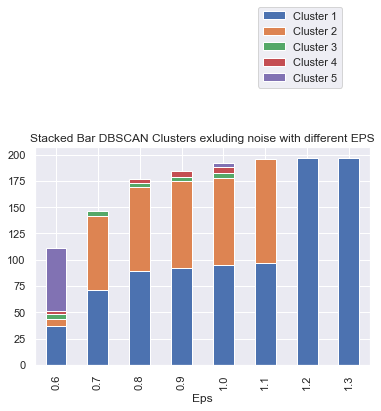

In [27]:
# plot data in stack manner of bar type
df1.plot(x='Eps', kind='bar', stacked=True,
        title='Stacked Bar DBSCAN Clusters exluding noise with different EPS')

plt.legend(bbox_to_anchor =(0.65, 1.25)) #moving legend outside the plot
   
plt.show()

***Eplanation of the Stacked Bar***

From the stacked bar we can see clusters per Eps. Eps 0.6 and 1.0 have the highest number of clusters. Eps 1.2 and 1.3 have only one cluster even though looking at the results of the VAT diagram we expected at least 2 clusters. This shows Eps 1.2 and 1.3 are not valid as the data is not seperated by distance.



*For each of the eight DBSCAN models, create a scatter plot of the features Diagonal vs Right. Use colours to indicate cluster assignment for each of the models. Use the same colours as used in Question 6.*

https://www.reneshbedre.com/blog/dbscan-python.html

In [28]:
# extracting the above mentioned columns
x = df.loc[:, ['Diagonal',
                 'Right']].values

In [29]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.6, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels

In [30]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([89, 37,  7,  4,  3, 60], dtype=int64))

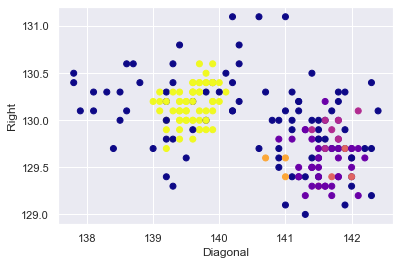

In [31]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot

In [32]:
dbscan = DBSCAN(eps = 0.7, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels

In [33]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64), array([54, 71, 71,  4], dtype=int64))

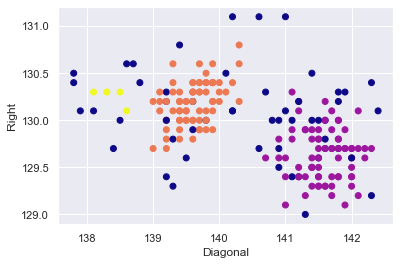

In [34]:
dbscan = DBSCAN(eps = 0.7, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot

In [35]:
dbscan = DBSCAN(eps = 0.8, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels

In [36]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([23, 89, 80,  4,  4], dtype=int64))

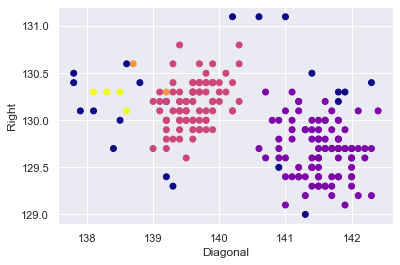

In [37]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot

In [38]:
dbscan = DBSCAN(eps = 0.9, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels

In [39]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([16, 92, 83,  4,  5], dtype=int64))

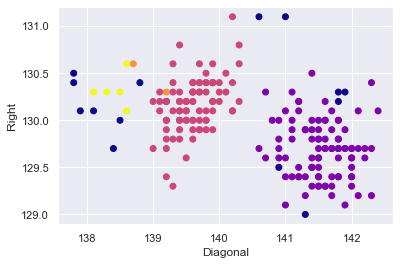

In [40]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot

In [41]:
dbscan = DBSCAN(eps = 1.0, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels


In [42]:
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([ 8, 95, 83,  4,  6,  4], dtype=int64))

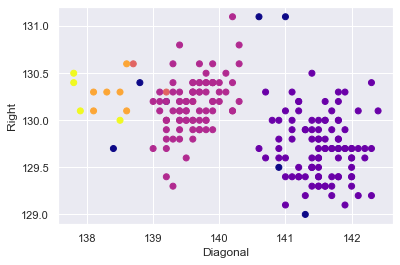

In [43]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot

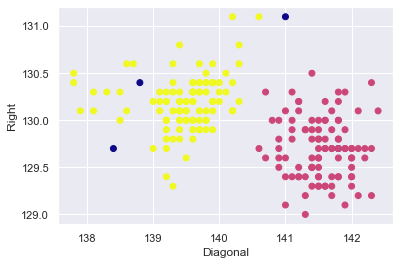

In [44]:
dbscan = DBSCAN(eps = 1.1, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis labell
plt.show() # showing the plot

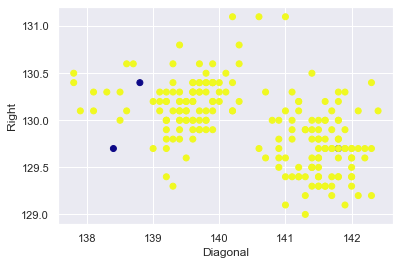

In [45]:
dbscan = DBSCAN(eps = 1.2, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot

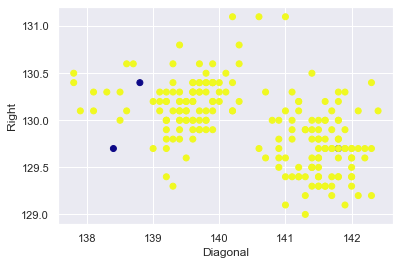

In [46]:
dbscan = DBSCAN(eps = 1.3, min_samples = 4).fit(df) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot


*Compute the Davies Bouldin score for each of the models with and without including the instances classified as noise in a separate cluster. Use your answers to populate the table provided below.*



Davies Bouldin score is calculated as the average similarity of each cluster with a cluster most similar to it. The lower the average similarity is, the better the clusters are separated and the better is the result of the clustering performed. So lower Davies Bouldin score is good and it is what we need to produce optimal clusters. Since it measures the distance between cluster centroids it is restricted to using Euclidean distance function.

***Normalisation***

The data is not normalised. Looking at the scatter plot matrix above there not all of the data is normally distributed. As much as it is not normal distributed, all the features are of the same scale so no normalization or standardisation is required. Normalisation is required when features are of different scales. Standardisation is useful when the feature distribution is Normal or Gaussian.

https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29

https://www.kaggle.com/code/marimmedhat/clustering-with-several-algorithms#8.-dbscan

In [47]:
# create data
df_DB_score = pd.DataFrame([['0.6', 0.9821627864925624,  1.394309362434212], 
                   ['0.7', 0.6688614036454276, 1.5165257886625656], 
                   ['0.8', 0.6723126061856564, 1.8291357456271111],
                   ['0.9', 0.7049949742669318, 1.9343516227204218],
                   ['1.0', 0.754259557412831, 1.6637333156269591], 
                   ['1.1', 0.7340121802046141,  1.8878275148286245], 
                   ['1.2', 'Invalid', 3.6228900747474526],
                   ['1.3', 'Invalid', 3.6228900747474526]],
                  columns=['Eps', 'Davies Bouldin (without noise cluster)', 'Davies Bouldin (with noise cluster)'])
# view data
df_DB_score

,Eps,Davies Bouldin (without noise cluster),Davies Bouldin (with noise cluster)
0,0.6,0.982163,1.394309
1,0.7,0.668861,1.516526
2,0.8,0.672313,1.829136
3,0.9,0.704995,1.934352
4,1.0,0.75426,1.663733
5,1.1,0.734012,1.887828
6,1.2,Invalid,3.622890
7,1.3,Invalid,3.622890


***Calculations are shown below***

In [48]:
from numpy import unique
from numpy import where
from sklearn.metrics import davies_bouldin_score

In [49]:
from sklearn.cluster import DBSCAN
def dbscan(money):
    cluster_dbscan = DBSCAN(eps=0.6, min_samples=4).fit(money)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

from sklearn.metrics import davies_bouldin_score
n=dbscan(money)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score of dbscan is ' , davies_bouldin_score(money,n))

davies_bouldin score of dbscan is  1.394309362434212


In [50]:
#removing noise (-1) on the data

#df_filtered will be without noise
#df will be with noise

In [51]:
dbscan(df)

array([-1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1,
        2, -1, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1,  0, -1,  3, -1,
       -1, -1,  1, -1,  1, -1, -1, -1,  2, -1, -1,  0,  0,  0,  0, -1, -1,
       -1, -1,  0,  0,  2, -1, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0,  2,
        1, -1, -1,  0, -1,  0,  0,  0, -1,  3,  0,  0, -1,  3, -1,  0, -1,
        0,  1,  0, -1,  0,  0,  1,  0,  0,  0,  1, -1,  0, -1,  0, -1,  4,
       -1, -1,  4,  4, -1, -1,  4, -1, -1,  4, -1,  4,  4, -1,  4,  4,  4,
        4,  4,  4, -1,  4, -1,  4, -1, -1, -1,  4, -1, -1,  4,  4,  4,  4,
        4, -1,  4,  4,  4, -1,  4,  4, -1,  4,  4, -1,  4,  4,  4, -1, -1,
        4,  4,  4, -1,  4, -1, -1, -1, -1,  4,  4,  4,  4, -1, -1,  4,  4,
       -1,  4,  4, -1,  4,  4,  4,  4,  4, -1,  4, -1,  4, -1,  4,  4, -1,
        4,  4, -1,  4, -1,  4, -1,  4,  4,  4,  4, -1, -1], dtype=int64)

In [52]:
df['array'] = dbscan(df)

In [53]:
df_array = df[df.array>-1]
df_array

,Length,Left,Right,Bottom,Top,Diagonal,array
3,214.8,129.7,129.6,7.5,10.4,142.0,0
7,214.5,129.6,129.2,7.2,10.7,141.7,0
11,215.1,129.5,129.6,7.7,10.5,142.2,0
13,214.7,129.7,129.7,7.7,10.9,141.7,0
14,215.1,129.9,129.7,7.7,10.8,141.8,0
...,...,...,...,...,...,...,...
192,214.7,130.3,130.2,10.8,11.1,139.2,4
194,214.9,130.3,130.5,11.6,10.6,139.8,4
195,215.0,130.4,130.3,9.9,12.1,139.6,4
196,215.1,130.3,129.9,10.3,11.5,139.7,4


In [54]:
df_filtered1 = df_array[df_array.array != -1]
df_filtered1

,Length,Left,Right,Bottom,Top,Diagonal,array
3,214.8,129.7,129.6,7.5,10.4,142.0,0
7,214.5,129.6,129.2,7.2,10.7,141.7,0
11,215.1,129.5,129.6,7.7,10.5,142.2,0
13,214.7,129.7,129.7,7.7,10.9,141.7,0
14,215.1,129.9,129.7,7.7,10.8,141.8,0
...,...,...,...,...,...,...,...
192,214.7,130.3,130.2,10.8,11.1,139.2,4
194,214.9,130.3,130.5,11.6,10.6,139.8,4
195,215.0,130.4,130.3,9.9,12.1,139.6,4
196,215.1,130.3,129.9,10.3,11.5,139.7,4


In [55]:
df_filtered = df_filtered1.drop(['array'], axis=1)
df_filtered

,Length,Left,Right,Bottom,Top,Diagonal
3,214.8,129.7,129.6,7.5,10.4,142.0
7,214.5,129.6,129.2,7.2,10.7,141.7
11,215.1,129.5,129.6,7.7,10.5,142.2
13,214.7,129.7,129.7,7.7,10.9,141.7
14,215.1,129.9,129.7,7.7,10.8,141.8
...,...,...,...,...,...,...
192,214.7,130.3,130.2,10.8,11.1,139.2
194,214.9,130.3,130.5,11.6,10.6,139.8
195,215.0,130.4,130.3,9.9,12.1,139.6
196,215.1,130.3,129.9,10.3,11.5,139.7


In [56]:
df = df.drop(['array'], axis=1)
df

,Length,Left,Right,Bottom,Top,Diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6
196,215.1,130.3,129.9,10.3,11.5,139.7
197,214.8,130.3,130.4,10.6,11.1,140.0
198,214.7,130.7,130.8,11.2,11.2,139.4


In [57]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=0.6, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
df_array = df[df.array>-1]
df_filtered1 = df_array[df_array.array != -1]
df_filtered = df_filtered1.drop(['array'], axis=1)
df = df.drop(['array'], axis=1)

from sklearn.metrics import davies_bouldin_score
n=dbscan(df_filtered)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score without noise of dbscan is ' , davies_bouldin_score(df_filtered,n))

davies_bouldin score without noise of dbscan is  0.9821627864925624


In [58]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=0.7, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

from sklearn.metrics import davies_bouldin_score
n=dbscan(df)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score of dbscan is ' , davies_bouldin_score(df,n))

davies_bouldin score of dbscan is  1.5165257886625656


In [59]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=0.7, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
df_array = df[df.array>-1]
df_filtered1 = df_array[df_array.array != -1]
df_filtered = df_filtered1.drop(['array'], axis=1)
df = df.drop(['array'], axis=1)

from sklearn.metrics import davies_bouldin_score
n=dbscan(df_filtered)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score without noise of dbscan is ' , davies_bouldin_score(df_filtered,n))

davies_bouldin score without noise of dbscan is  0.6688614036454276


In [60]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=0.8, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

from sklearn.metrics import davies_bouldin_score
n=dbscan(df)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score of dbscan is ' , davies_bouldin_score(df,n))

davies_bouldin score of dbscan is  1.8291357456271111


In [61]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=0.8, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
df_array = df[df.array>-1]
df_filtered1 = df_array[df_array.array != -1]
df_filtered = df_filtered1.drop(['array'], axis=1)
df = df.drop(['array'], axis=1)

from sklearn.metrics import davies_bouldin_score
n=dbscan(df_filtered)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score without noise of dbscan is ' , davies_bouldin_score(df_filtered,n))

davies_bouldin score without noise of dbscan is  0.6723126061856564


In [62]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=0.9, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

from sklearn.metrics import davies_bouldin_score
n=dbscan(df)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score of dbscan is ' , davies_bouldin_score(df,n))

davies_bouldin score of dbscan is  1.9343516227204218


In [63]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=0.9, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
df_array = df[df.array>-1]
df_filtered1 = df_array[df_array.array != -1]
df_filtered = df_filtered1.drop(['array'], axis=1)
df = df.drop(['array'], axis=1)

from sklearn.metrics import davies_bouldin_score
n=dbscan(df_filtered)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score without noise of dbscan is ' , davies_bouldin_score(df_filtered,n))

davies_bouldin score without noise of dbscan is  0.7049949742669318


In [64]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=1.0, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

from sklearn.metrics import davies_bouldin_score
n=dbscan(df)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score of dbscan is ' , davies_bouldin_score(df,n))

davies_bouldin score of dbscan is  1.6637333156269591


In [65]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=1.0, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
df_array = df[df.array>-1]
df_filtered1 = df_array[df_array.array != -1]
df_filtered = df_filtered1.drop(['array'], axis=1)
df = df.drop(['array'], axis=1)

from sklearn.metrics import davies_bouldin_score
n=dbscan(df_filtered)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score without noise of dbscan is ' , davies_bouldin_score(df_filtered,n))

davies_bouldin score without noise of dbscan is  0.754259557412831


In [66]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=1.1, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

from sklearn.metrics import davies_bouldin_score
n=dbscan(df)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score of dbscan is ' , davies_bouldin_score(df,n))

davies_bouldin score of dbscan is  1.8878275148286245


In [67]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=1.1, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
df_array = df[df.array>-1]
df_filtered1 = df_array[df_array.array != -1]
df_filtered = df_filtered1.drop(['array'], axis=1)
df = df.drop(['array'], axis=1)

from sklearn.metrics import davies_bouldin_score
n=dbscan(df_filtered)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score without noise of dbscan is ' , davies_bouldin_score(df_filtered,n))

davies_bouldin score without noise of dbscan is  0.7340121802046141


In [68]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=1.2, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

from sklearn.metrics import davies_bouldin_score
n=dbscan(df)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score of dbscan is ' , davies_bouldin_score(df,n))

davies_bouldin score of dbscan is  3.6228900747474526


In [69]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=1.2, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
df_array = df[df.array>-1]
df_filtered1 = df_array[df_array.array != -1]
df_filtered = df_filtered1.drop(['array'], axis=1)
df = df.drop(['array'], axis=1)

from sklearn.metrics import davies_bouldin_score
n=dbscan(df_filtered)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
#print('davies_bouldin score without noise of dbscan is ' , davies_bouldin_score(df_filtered,n))

{0: 197}

In [70]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=1.3, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

from sklearn.metrics import davies_bouldin_score
n=dbscan(df)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
print('davies_bouldin score of dbscan is ' , davies_bouldin_score(df,n))

davies_bouldin score of dbscan is  3.6228900747474526


In [71]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=1.3, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
df_array = df[df.array>-1]
df_filtered1 = df_array[df_array.array != -1]
df_filtered = df_filtered1.drop(['array'], axis=1)
df = df.drop(['array'], axis=1)

from sklearn.metrics import davies_bouldin_score
n=dbscan(df_filtered)
n.shape
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))
#print('davies_bouldin score without noise of dbscan is ' , davies_bouldin_score(df_filtered,n))

{0: 197}

In [72]:
#Davies Bouldin score
df_DB_score

,Eps,Davies Bouldin (without noise cluster),Davies Bouldin (with noise cluster)
0,0.6,0.982163,1.394309
1,0.7,0.668861,1.516526
2,0.8,0.672313,1.829136
3,0.9,0.704995,1.934352
4,1.0,0.75426,1.663733
5,1.1,0.734012,1.887828
6,1.2,Invalid,3.622890
7,1.3,Invalid,3.622890




*With regards to the results obtained for Davies Bouldin score, answer the following questions:
*- Based only on the Davies Bouldin score, which Eps values should be selected when the calculation is performed with the noise *instances grouped in one cluster?
*- Based only on the Davies Bouldin score, which Eps values should be selected when the calculation is performed without the *noise instances?
*- Is it better to use the Davies Bouldin score with or without considering noise? Motivate your answer*

Davies Bouldin score is calculated as the average similarity of each cluster with a cluster most similar to it. The lower the average similarity is, the better the clusters are separated and the better is the result of the clustering performed. So below I have picked Eps that produced the lowest Bouldin scores for with noise and without noise.

With noise(Eps) = 0.6

-For calculations with the noise instances grouped in one cluster we should select Eps of 0.6. Eps 0.6 gives the lowest Davies    Bouldin score which makes it the best for cluster with noise.

Without noise(Eps) = 0.7

-For calculations without the noise instances we should select Eps of 0.7. Eps 0.7 gives the lowest Davies Bouldin score which makes it the best for cluster with noise.

-It is better to use without noise instaces for clutering. The smallest Davies Bouldin score of 0.668861 is observed on the instances without noise. The instaces without noise have the more low scores compared to the instances with noise in a cluster. It is worth noting that higher Eps of 1.2 qnd 1.3 did not produce scores.

Using data from previous steos, lets create a scatter plot matrix to illustrate the clusters for all pairs of descriptive features, indicate which Eps was selected, and motivate your selection of Eps.*

***With Noise***

Looking at the information from the instances with noise from Question 7,8 and 9 we can see that the lowest Davies Bouldin score is on Eps 0.6. The idea is that we pick the Eps with the lowest score, so the lower the average similarity is, the better the clusters are separated and the better is the result of the clustering performed. Issue is that we are not working in isolation of the Davies Bouldin score only, had tp consider the data on Question 7 which show that Eps 0.6 and 0.7 as much as they have lowest Davies Bouldin score but the clusters are not clear. There is a lof of noise at low which impedes clear visibility of the clusters. The third lowest Davies Bouldin score was on Eps 1.0 and there was less noise within the clusters. The clusters are clearly visible and this why I chose Eps of 1.0 as my optimal Eps.

Below is a scatter plot matrix that shows the scatters using the chosen Eps of 1.0.

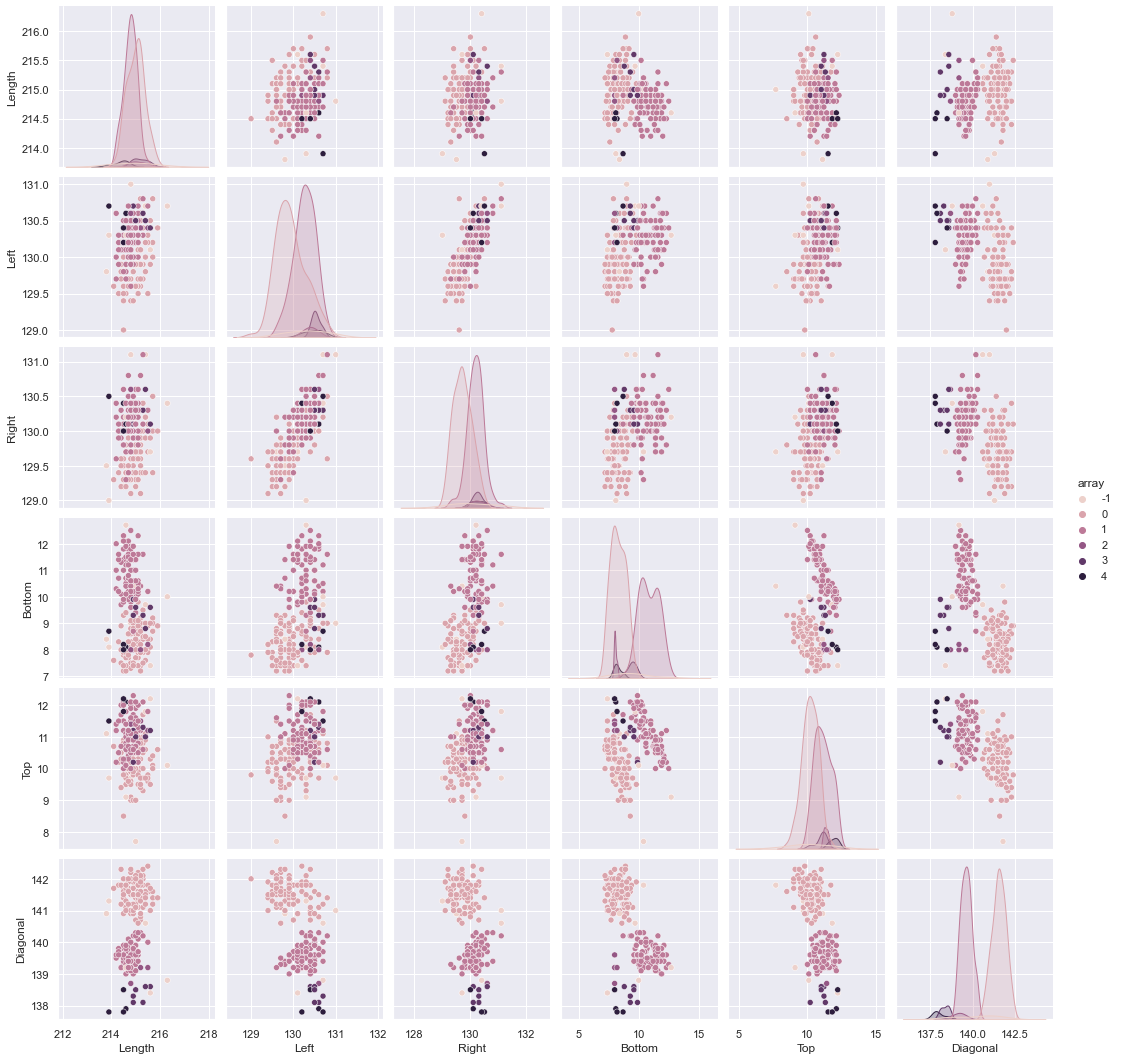

In [73]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=1.0, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
#df
sns.pairplot(df, hue = 'array')

I have also decided to test out how will the matrix look like for instances without noise using the Eps with the lowest Davies Bouldin score. I have only relied on the Davies Bouldin score to choose the Eps here since I had equivalent information to what I have for instaces with noise.

***Withouth Noise***

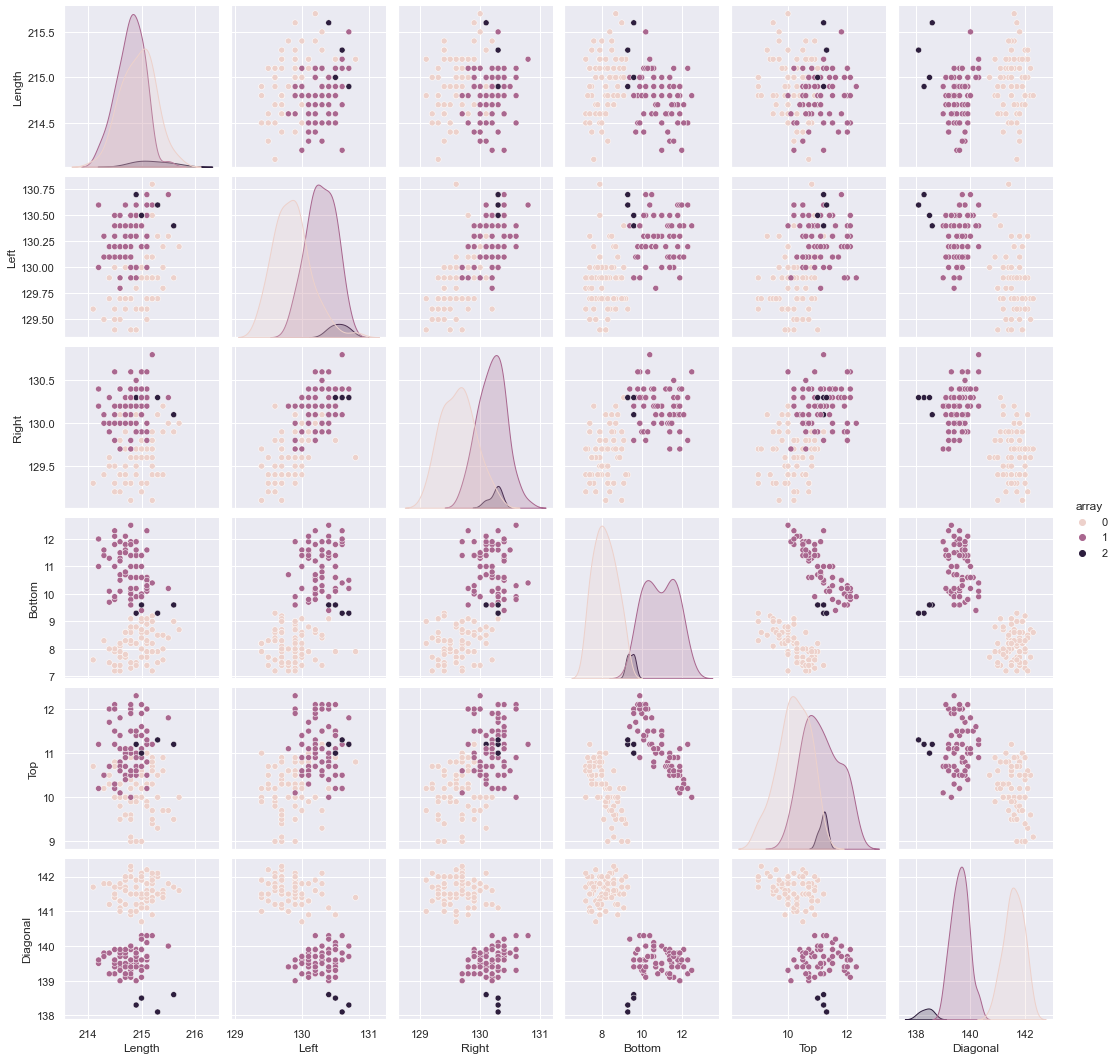

In [74]:
from sklearn.cluster import DBSCAN
def dbscan(df):
    cluster_dbscan = DBSCAN(eps=0.7, min_samples=4).fit(df)
    n=cluster_dbscan.labels_
    return  cluster_dbscan.labels_

dbscan(df)
df['array'] = dbscan(df)
df_array = df[df.array>-1]
df_filtered1 = df_array[df_array.array != -1]

sns.pairplot(df_filtered1, hue = 'array')

In [75]:
df = df.drop(['array'], axis=1)
df

,Length,Left,Right,Bottom,Top,Diagonal
0,214.8,131.0,131.1,9.0,9.7,141.0
1,214.6,129.7,129.7,8.1,9.5,141.7
2,214.8,129.7,129.7,8.7,9.6,142.2
3,214.8,129.7,129.6,7.5,10.4,142.0
4,215.0,129.6,129.7,10.4,7.7,141.8
...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6
196,215.1,130.3,129.9,10.3,11.5,139.7
197,214.8,130.3,130.4,10.6,11.1,140.0
198,214.7,130.7,130.8,11.2,11.2,139.4


To estimate the stability of the solution provided in Question 10, create three subsamples of size 200 by sampling with replacement. Apply DBSCAN to each subsample with the same parameters as used in Question 10. Create a scatter plot of the features Diagonal vs Right for each subsample and make use of colours to indicate cluster assignment. Does your solution produce the same clustering results for each subsample?

In [76]:
import random

In [77]:
money1 = df.values  #convert df to array

In [78]:
Sub_sample_1 = [random.choice(money1) for _ in range(200)]
Sub_sample_1

[array([214.6, 129.8, 130.2,  10.7,  11.1, 139.4]),
 array([215. , 130. , 129.6,   7.7,  10.5, 140.7]),
 array([214.8, 129.4, 129.1,   8.2,  10.2, 141. ]),
 array([215.1, 129.5, 129.6,   7.7,  10.5, 142.2]),
 array([214.8, 130.1, 130. ,  11.4,  10.5, 139.6]),
 array([214.8, 130. , 129.7,  11.4,  10.6, 139.2]),
 array([214.8, 130. , 129.7,  11.4,  10.6, 139.2]),
 array([214.9, 130.4, 129.7,   9. ,   9.8, 140.9]),
 array([215.6, 129.9, 129.9,   9. ,   9.5, 141.7]),
 array([214.4, 129.8, 129.2,   8.9,   9.4, 142.3]),
 array([215.6, 130.1, 129.7,   7.4,  12.2, 138.4]),
 array([214.7, 130.3, 130.2,  10.8,  11.1, 139.2]),
 array([214.3, 129.5, 129.4,   8.3,  10.2, 141.8]),
 array([214.6, 129.8, 130.2,  10.7,  11.1, 139.4]),
 array([214.8, 129.7, 129.6,   7.5,  10.4, 142. ]),
 array([216.3, 130.7, 130.4,  10. ,  10.1, 138.8]),
 array([214.5, 130.4, 130. ,   8. ,  12.2, 138.5]),
 array([214.5, 130.2, 130.4,   8.2,  11.8, 137.8]),
 array([215.1, 130.5, 130.3,  10.6,  11.5, 140.1]),
 array([215.

In [79]:
Sub_sample_1_ = pd.DataFrame(Sub_sample_1)
Sub_sample_1_.columns = ['Length','Left','Right','Bottom','Top','Diagonal']
Sub_sample_1_

,Length,Left,Right,Bottom,Top,Diagonal
0,214.6,129.8,130.2,10.7,11.1,139.4
1,215.0,130.0,129.6,7.7,10.5,140.7
2,214.8,129.4,129.1,8.2,10.2,141.0
3,215.1,129.5,129.6,7.7,10.5,142.2
4,214.8,130.1,130.0,11.4,10.5,139.6
...,...,...,...,...,...,...
195,215.2,129.7,129.1,9.0,9.7,141.9
196,214.6,130.2,130.4,10.5,11.8,139.7
197,214.5,130.1,130.0,7.8,10.9,140.9
198,215.5,130.4,130.0,8.2,11.2,139.2


In [80]:
Sub_sample_2 = [random.choice(money1) for _ in range(200)]
Sub_sample_2_ = pd.DataFrame(Sub_sample_2)
Sub_sample_2_.columns = ['Length','Left','Right','Bottom','Top','Diagonal']
Sub_sample_2_

,Length,Left,Right,Bottom,Top,Diagonal
0,214.6,130.2,130.4,10.5,11.8,139.7
1,214.8,130.6,130.6,8.0,11.4,138.7
2,214.3,130.1,130.1,11.6,10.5,139.7
3,214.8,130.1,130.4,9.8,11.5,139.9
4,214.7,130.5,130.5,9.9,10.3,140.1
...,...,...,...,...,...,...
195,215.1,130.0,129.8,8.2,10.3,141.4
196,214.6,129.8,130.2,10.7,11.1,139.4
197,214.6,129.9,129.4,7.9,10.0,141.8
198,214.6,129.8,130.2,10.7,11.1,139.4


In [81]:
Sub_sample_3 = [random.choice(money1) for _ in range(200)]
Sub_sample_3_ = pd.DataFrame(Sub_sample_3)
Sub_sample_3_.columns = ['Length','Left','Right','Bottom','Top','Diagonal']
Sub_sample_3_

,Length,Left,Right,Bottom,Top,Diagonal
0,214.9,129.4,129.7,8.2,11.0,141.9
1,215.1,130.2,130.2,10.1,11.3,140.3
2,215.3,130.6,130.0,9.5,9.7,141.1
3,215.3,129.7,129.4,7.5,10.5,141.5
4,214.7,129.6,129.5,8.3,10.0,142.0
...,...,...,...,...,...,...
195,215.3,130.6,130.3,9.3,11.3,138.1
196,214.6,130.1,130.0,11.5,10.6,139.5
197,214.8,130.1,130.4,9.8,11.5,139.9
198,214.8,130.1,130.1,11.9,11.1,139.5


In [82]:
# extracting the above mentioned columns
x = Sub_sample_1_.loc[:, ['Diagonal',
                 'Right']].values

In [83]:
dbscan = DBSCAN(eps = 1.0, min_samples = 4).fit(Sub_sample_1_) # fitting the model
labels = dbscan.labels_ # getting the labels

np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3], dtype=int64),
 array([12, 82, 91,  9,  6], dtype=int64))

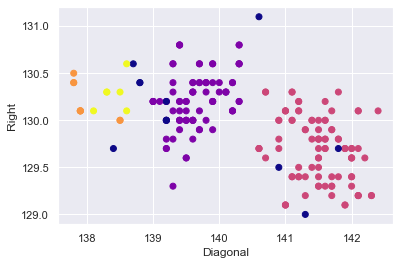

In [84]:
dbscan = DBSCAN(eps = 1.0, min_samples = 4).fit(Sub_sample_1_) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot

In [85]:
dbscan = DBSCAN(eps = 1.0, min_samples = 4).fit(Sub_sample_2_) # fitting the model
labels = dbscan.labels_ # getting the labels

np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64), array([19, 92, 84,  5], dtype=int64))

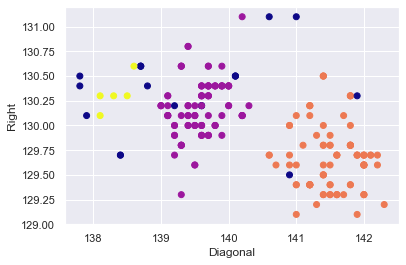

In [86]:
# extracting the above mentioned columns
x = Sub_sample_2_.loc[:, ['Diagonal',
                 'Right']].values

dbscan = DBSCAN(eps = 1.0, min_samples = 4).fit(Sub_sample_2_) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot

In [87]:
dbscan = DBSCAN(eps = 1.0, min_samples = 4).fit(Sub_sample_3_) # fitting the model
labels = dbscan.labels_ # getting the labels

np.unique(labels, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 11, 103,  86], dtype=int64))

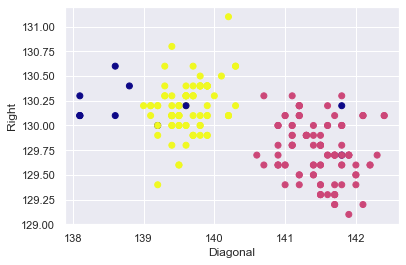

In [88]:
# extracting the above mentioned columns
x = Sub_sample_3_.loc[:, ['Diagonal',
                 'Right']].values

dbscan = DBSCAN(eps = 1.0, min_samples = 4).fit(Sub_sample_3_) # fitting the model
labels = dbscan.labels_ # getting the labels

# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Diagonal") # X-axis label
plt.ylabel("Right") # Y-axis label
plt.show() # showing the plot

The results of the clustering are similar but not exacly the same. The sub-sample 1 and 3 have the same number of clusters(5) while sub-sample 2 has (4) clusters. 

The solution does not produce exactly the same results for all the sub samples.

It is difficult to conclude that the solution with Eps 1.0 is stable becuase of the differences in the results of the sub-samples.  As mentioned sub-sample 2 has 4 clusters while the other 2 have 5 clusters.

***References***

https://www.kaggle.com/code/marimmedhat/clustering-with-several-algorithms#8.-dbscan

https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

https://medium.com/analytics-vidhya/using-visualization-algorithms-vat-ivat-to-assess-cluster-tendency-a89251a2400e

https://towardsdatascience.com/k-means-dbscan-gmm-agglomerative-clustering-mastering-the-popular-models-in-a-segmentation-c891a3818e29

https://www.geeksforgeeks.org/normalization-vs-standardization/

https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd#:~:text=This%20technique%20calculates%20the%20average,on%20a%20k%2Ddistance%20graph.